# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

# Topic:Explore Environmental Justice in Oakland

I want to exlopre whether different races groups are exposed to different environment quality.Potential datasets: CalEnviroScreen scores, ACS demographic data, accessibility to green spaces, etc.

### 1. ACS Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
acs = pd.read_csv("ACSDT5Y2020.B03002-Data.csv")

In [3]:
acs.head()

,GEO_ID,NAME,B03002_001E,B03002_001EA,B03002_001M,B03002_001MA,B03002_002E,B03002_002EA,B03002_002M,B03002_002MA,...,B03002_019MA,B03002_020E,B03002_020M,B03002_020MA,B03002_020EA,B03002_021E,B03002_021M,B03002_021MA,B03002_021EA,Unnamed: 86
0,Geography,Geographic Area Name,Estimate!!Total:,Annotation of Estimate!!Total:,Margin of Error!!Total:,Annotation of Margin of Error!!Total:,Estimate!!Total:!!Not Hispanic or Latino:,Annotation of Estimate!!Total:!!Not Hispanic o...,Margin of Error!!Total:!!Not Hispanic or Latino:,Annotation of Margin of Error!!Total:!!Not His...,...,Annotation of Margin of Error!!Total:!!Hispani...,Estimate!!Total:!!Hispanic or Latino:!!Two or ...,Margin of Error!!Total:!!Hispanic or Latino:!!...,Annotation of Margin of Error!!Total:!!Hispani...,Annotation of Estimate!!Total:!!Hispanic or La...,Estimate!!Total:!!Hispanic or Latino:!!Two or ...,Margin of Error!!Total:!!Hispanic or Latino:!!...,Annotation of Margin of Error!!Total:!!Hispani...,Annotation of Estimate!!Total:!!Hispanic or La...,NaN
1,1400000US06001400100,"Census Tract 4001, Alameda County, California",3035,NaN,402,NaN,2910,NaN,397,NaN,...,NaN,0,13,NaN,NaN,0,13,NaN,NaN,NaN
2,1400000US06001400200,"Census Tract 4002, Alameda County, California",1983,NaN,209,NaN,1820,NaN,210,NaN,...,NaN,17,25,NaN,NaN,50,42,NaN,NaN,NaN
3,1400000US06001400300,"Census Tract 4003, Alameda County, California",5058,NaN,559,NaN,4595,NaN,512,NaN,...,NaN,148,163,NaN,NaN,0,19,NaN,NaN,NaN
4,1400000US06001400400,"Census Tract 4004, Alameda County, California",4179,NaN,529,NaN,3706,NaN,514,NaN,...,NaN,25,25,NaN,NaN,40,43,NaN,NaN,NaN


In [4]:
acs = acs.drop(
    labels=0, 
    axis=0 
)

In [5]:
acs.head()

,GEO_ID,NAME,B03002_001E,B03002_001EA,B03002_001M,B03002_001MA,B03002_002E,B03002_002EA,B03002_002M,B03002_002MA,...,B03002_019MA,B03002_020E,B03002_020M,B03002_020MA,B03002_020EA,B03002_021E,B03002_021M,B03002_021MA,B03002_021EA,Unnamed: 86
1,1400000US06001400100,"Census Tract 4001, Alameda County, California",3035,NaN,402,NaN,2910,NaN,397,NaN,...,NaN,0,13,NaN,NaN,0,13,NaN,NaN,NaN
2,1400000US06001400200,"Census Tract 4002, Alameda County, California",1983,NaN,209,NaN,1820,NaN,210,NaN,...,NaN,17,25,NaN,NaN,50,42,NaN,NaN,NaN
3,1400000US06001400300,"Census Tract 4003, Alameda County, California",5058,NaN,559,NaN,4595,NaN,512,NaN,...,NaN,148,163,NaN,NaN,0,19,NaN,NaN,NaN
4,1400000US06001400400,"Census Tract 4004, Alameda County, California",4179,NaN,529,NaN,3706,NaN,514,NaN,...,NaN,25,25,NaN,NaN,40,43,NaN,NaN,NaN
5,1400000US06001400500,"Census Tract 4005, Alameda County, California",4021,NaN,631,NaN,3662,NaN,631,NaN,...,NaN,23,22,NaN,NaN,79,72,NaN,NaN,NaN


In [6]:
acs_race = (acs[['GEO_ID','B03002_001E','B03002_003E','B03002_004E','B03002_006E','B03002_012E']])

In [7]:
acs_race.head()

,GEO_ID,B03002_001E,B03002_003E,B03002_004E,B03002_006E,B03002_012E
1,1400000US06001400100,3035,2205,94,424,125
2,1400000US06001400200,1983,1333,44,219,163
3,1400000US06001400300,5058,3085,433,773,463
4,1400000US06001400400,4179,2695,278,418,473
5,1400000US06001400500,4021,1797,1101,387,359


In [8]:
acs_race = acs_race.rename(columns = {'B03002_001E':'total', 
                        'B03002_003E':'white',
                        'B03002_004E':'black',
                        'B03002_006E':'asian',
                        'B03002_012E':'hispanic'})

In [9]:
acs_race.head()

,GEO_ID,total,white,black,asian,hispanic
1,1400000US06001400100,3035,2205,94,424,125
2,1400000US06001400200,1983,1333,44,219,163
3,1400000US06001400300,5058,3085,433,773,463
4,1400000US06001400400,4179,2695,278,418,473
5,1400000US06001400500,4021,1797,1101,387,359


In [10]:
acs_race.shape

(381, 6)

In [13]:
#get rid of 
acs_race['GEO_ID'] = acs_race['GEO_ID'].astype(str).str[10:]

In [14]:
acs_race.head()

,GEO_ID,total,white,black,asian,hispanic
1,6001400100,3035,2205,94,424,125
2,6001400200,1983,1333,44,219,163
3,6001400300,5058,3085,433,773,463
4,6001400400,4179,2695,278,418,473
5,6001400500,4021,1797,1101,387,359


In [16]:
acs_race['white'] = pd.to_numeric(acs_race['white'])
acs_race['black'] = pd.to_numeric(acs_race['black'])
acs_race['total'] = pd.to_numeric(acs_race['total'])
acs_race['asian'] = pd.to_numeric(acs_race['asian'])
acs_race['hispanic'] = pd.to_numeric(acs_race['hispanic'])

In [17]:
acs_race['pct_white'] = round((acs_race['white'] / acs_race['total'] * 100),2)
acs_race['pct_black'] = round((acs_race['black'] / acs_race['total'] * 100),2)
acs_race['pct_asian'] = round((acs_race['asian'] / acs_race['total'] * 100),2)
acs_race['pct_hispanic'] = round((acs_race['hispanic'] / acs_race['total'] * 100),2)
acs_race.head()

,GEO_ID,total,white,black,asian,hispanic,pct_white,pct_black,pct_asian,pct_hispanic
1,6001400100,3035,2205,94,424,125,72.65,3.10,13.97,4.12
2,6001400200,1983,1333,44,219,163,67.22,2.22,11.04,8.22
3,6001400300,5058,3085,433,773,463,60.99,8.56,15.28,9.15
4,6001400400,4179,2695,278,418,473,64.49,6.65,10.00,11.32
5,6001400500,4021,1797,1101,387,359,44.69,27.38,9.62,8.93


### 2. CalEnviroScreen 4.0 Data

In [18]:
enviro = pd.read_csv(
    'calenviro.csv',
    usecols=['Census Tract', 'CES 4.0 Score', 'CES 4.0 Percentile'])

In [19]:
enviro.head()

,Census Tract,CES 4.0 Score,CES 4.0 Percentile
0,6019001100,93.18,100.00
1,6077000700,86.65,99.99
2,6037204920,82.39,99.97
3,6019000700,81.33,99.96
4,6019000200,80.75,99.95


In [39]:
import numpy as np

enviro['CES 4.0 Range'] = np.where(enviro['CES 4.0 Percentile'] > 95, 'high score', 
                                   np.where(enviro['CES 4.0 Percentile'] < 5, 'low score', 'median score'))

enviro.head()

,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Range,GEO_ID
0,93.18,100.00,high score,6019001100
1,86.65,99.99,high score,6077000700
2,82.39,99.97,high score,6037204920
3,81.33,99.96,high score,6019000700
4,80.75,99.95,high score,6019000200


In [30]:
enviro.rename(columns={'Census Tract': 'GEO_ID'}, inplace=True)

In [31]:
enviro.head()

,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Range,GEO_ID
0,93.18,100.00,high score,6019001100
1,86.65,99.99,high score,6077000700
2,82.39,99.97,high score,6037204920
3,81.33,99.96,high score,6019000700
4,80.75,99.95,high score,6019000200


In [36]:
enviro['GEO_ID'] = enviro['GEO_ID'].astype('str')

In [43]:
merge = pd.merge(acs_race, enviro, how="left", on=["GEO_ID"])
merge = merge.drop(merge.index[-2:])
merge

,GEO_ID,total,white,black,asian,hispanic,pct_white,pct_black,pct_asian,pct_hispanic,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Range
0,6001400100,3035,2205,94,424,125,72.65,3.10,13.97,4.12,4.85,2.80,low score
1,6001400200,1983,1333,44,219,163,67.22,2.22,11.04,8.22,4.88,2.87,low score
2,6001400300,5058,3085,433,773,463,60.99,8.56,15.28,9.15,11.20,15.94,median score
3,6001400400,4179,2695,278,418,473,64.49,6.65,10.00,11.32,12.39,18.97,median score
4,6001400500,4021,1797,1101,387,359,44.69,27.38,9.62,8.93,16.73,29.74,median score
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,6001981900,47,41,0,0,6,87.23,0.00,0.00,12.77,NaN,NaN,median score
375,6001982000,26,12,5,0,7,46.15,19.23,0.00,26.92,NaN,NaN,median score
376,6001982100,1002,342,53,417,172,34.13,5.29,41.62,17.17,NaN,NaN,NaN
377,6001983200,587,342,67,114,33,58.26,11.41,19.42,5.62,28.20,55.32,median score


In [56]:
merge = merge.dropna(subset=['CES 4.0 Score'])

In [57]:
merge

,GEO_ID,total,white,black,asian,hispanic,pct_white,pct_black,pct_asian,pct_hispanic,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Range
0,6001400100,3035,2205,94,424,125,72.65,3.10,13.97,4.12,4.85,2.80,low score
1,6001400200,1983,1333,44,219,163,67.22,2.22,11.04,8.22,4.88,2.87,low score
2,6001400300,5058,3085,433,773,463,60.99,8.56,15.28,9.15,11.20,15.94,median score
3,6001400400,4179,2695,278,418,473,64.49,6.65,10.00,11.32,12.39,18.97,median score
4,6001400500,4021,1797,1101,387,359,44.69,27.38,9.62,8.93,16.73,29.74,median score
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,6001451602,7329,4992,159,576,1143,68.11,2.17,7.86,15.60,12.65,19.54,median score
371,6001451701,3091,2020,75,421,448,65.35,2.43,13.62,14.49,7.87,8.27,median score
372,6001451703,4150,2526,32,766,698,60.87,0.77,18.46,16.82,6.34,5.42,median score
373,6001451704,4692,3402,0,426,574,72.51,0.00,9.08,12.23,7.29,7.26,median score


In [58]:
group = merge[['pct_black', 'pct_white','pct_asian','pct_hispanic','CES 4.0 Range']].groupby('CES 4.0 Range')
group

In [59]:
list(grouped)

[('high score',
      pct_black  pct_white  pct_asian  pct_hispanic CES 4.0 Range
  80       8.90      12.47       2.72         73.43    high score
  95      37.22       7.11       5.48         46.90    high score
  97      30.61       1.41       5.30         58.41    high score),
 ('low score',
       pct_black  pct_white  pct_asian  pct_hispanic CES 4.0 Range
  0         3.10      72.65      13.97          4.12     low score
  1         2.22      67.22      11.04          8.22     low score
  43        1.64      68.67      14.30          9.95     low score
  44        2.07      64.33      14.13          1.98     low score
  45        4.19      68.72      11.45          6.03     low score
  47        5.39      64.89      11.87          3.97     low score
  48        4.76      69.27      12.53          7.72     low score
  87       10.65      56.67      11.71         16.73     low score
  120       0.00      65.33      12.92         13.20     low score
  121       1.91      83.04      

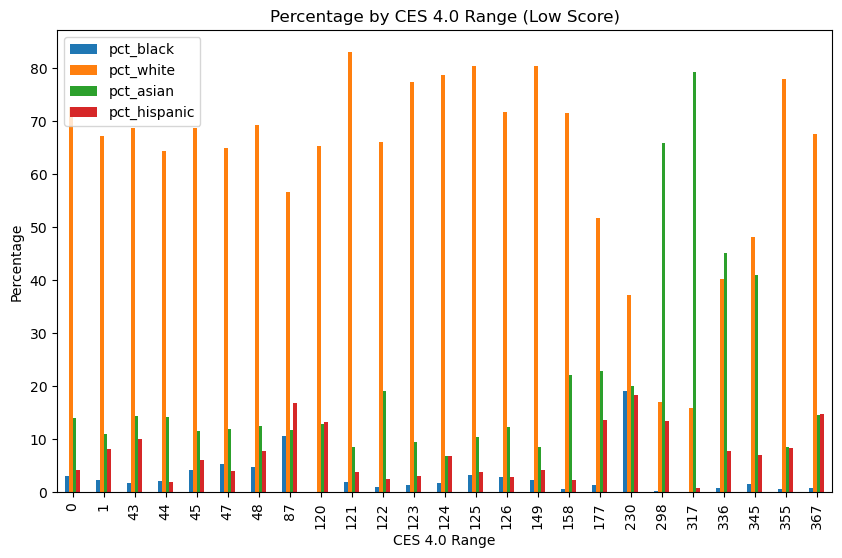

In [61]:
low_score_group = group.get_group('low score')


low_score_group.plot(kind='bar', figsize=(10, 6))


plt.title('Percentage by CES 4.0 Range (Low Score)')
plt.xlabel('CES 4.0 Range')
plt.ylabel('Percentage')


plt.show()

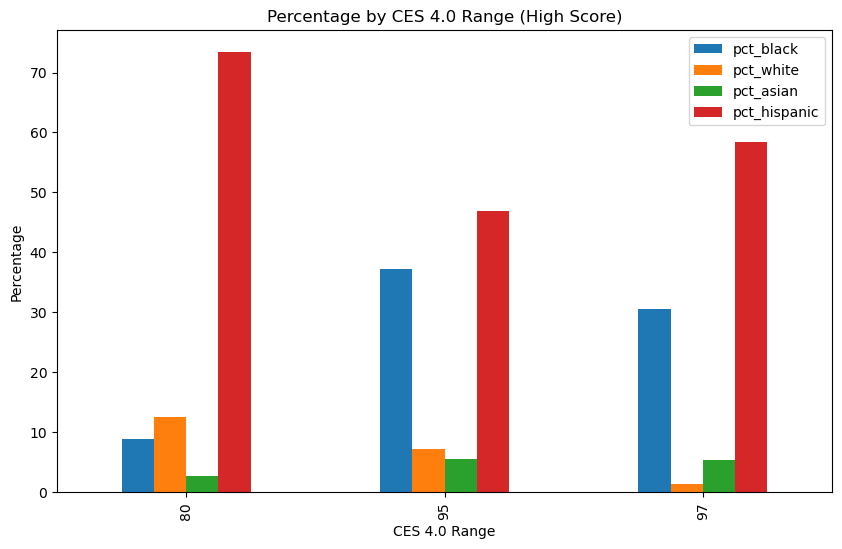

In [62]:
low_score_group = group.get_group('high score')


low_score_group.plot(kind='bar', figsize=(10, 6))


plt.title('Percentage by CES 4.0 Range (High Score)')
plt.xlabel('CES 4.0 Range')
plt.ylabel('Percentage')


plt.show()

### Conclusion:

According to the data plots, there are many areas in Oakland in poor environment, especially the areas with a high proportion of Asian people. Only three census tracts have high environmental scores.

# API Practice

In [2]:
import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs
import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()

In [7]:
#San Francisco Urban Tree Canopy#

endpoint_url = "https://data.sfgov.org/resource/ni2e-vpbg.json"
response = requests.get(endpoint_url)

In [8]:
results = response.text
print(type(results))
print(results[:500])

<class 'str'>
[{"name":"Trees","the_geom":{"type":"MultiPolygon","coordinates":[[[[-122.43470182548175,37.70830493753752],[-122.43471111514388,37.70830478493949],[-122.43471111364656,37.708304982069436],[-122.43470182548175,37.70830493753752]]]]},"t_sqft":"0.0964338008024","acres":"0.00000221382430071"}
,{"name":"Trees","the_geom":{"type":"MultiPolygon","coordinates":[[[[-122.43473380785107,37.70830441217124],[-122.43473981118332,37.708304313555054],[-122.43473983216509,37.70830511975506],[-122.43474006676846


In [11]:
import pandas as pd
data = json.loads(results)
pd.DataFrame.from_records(data, columns=['name','the_geom', 't_sqft','acres']).head()

,name,the_geom,t_sqft,acres
0,Trees,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",0.0964338008024,0.00000221382430071
1,Trees,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6.33866669167,0.000145516346336
2,Trees,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",5.50200175546,0.00012630908548
3,Trees,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",50.464468704,0.00115850942522
4,Trees,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",246.276067144,0.00565374316464


# Research Plan

Research questions:
1. Does the distribution of races have corelationship with environmental pollution?
2. Which area has more tree canopy? 
3. How is the urban heat environment?

Research plan:

After groupby some dataframe, will do some Correlation coefficient analysis;

Generate an interactive map shows which area are exposed to environment injustice;

Use some functions to calculate communities accessibility to green spaces;

Mapping the tree canopy and urban heat.